# Boston House Prices Practice

In [36]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn import linear_model
from sklearn.metrics import r2_score
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataBoston=load_boston()

### 1. Import Data Boston House Prices From Sklearn

In [3]:
df=pd.DataFrame(
    dataBoston['data'],columns=dataBoston['feature_names']
)
print(df.shape)
df.head()

(506, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
df['Price']=dataBoston['target']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### 2. Check Correlation between variables

In [47]:
korelasi=df.corr()
korelasi

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


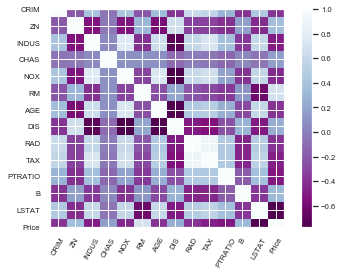

In [46]:
plt.imshow(korelasi, cmap='BuPu_r')
plt.colorbar()
plt.xticks(np.arange(14),list(df.columns),rotation=60)
plt.yticks(np.arange(14),list(df.columns))
plt.show()

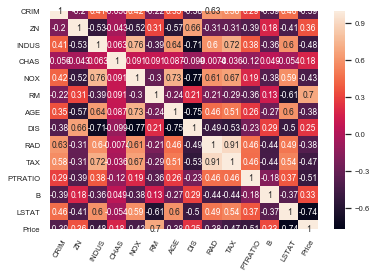

In [17]:
sns.set(font_scale=0.7)
sns.heatmap(korelasi,annot=True)
plt.xticks(rotation=60)
plt.show()

### 4. Model Machine Learning

In [56]:
model=linear_model.LinearRegression()
model.fit(df[['ZN','CHAS','RM','DIS','B','LSTAT']],df['Price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
model.predict(df[['ZN','CHAS','RM','DIS','B','LSTAT']])

array([29.31820102, 23.935359  , 30.72894989, 29.59457353, 28.75265755,
       25.4936966 , 20.14716827, 16.1618015 ,  6.38809252, 15.99933907,
       15.83547709, 18.98990137, 17.47646364, 22.57522983, 21.95094666,
       22.08432581, 23.66509179, 18.86538105, 17.48075373, 20.34462243,
       13.08180682, 19.60034506, 17.31817637, 14.9075717 , 17.46902854,
       14.58255636, 17.43845574, 16.1831098 , 22.24341511, 23.69833895,
       12.09272952, 20.24897743,  8.38849825, 15.19942785, 14.2840854 ,
       22.81593319, 20.99271488, 22.49882426, 22.18038869, 32.27515794,
       35.77495545, 27.49876584, 24.07308611, 23.35072557, 21.25469771,
       19.71358763, 17.62420128, 15.11932102,  4.27546875, 14.53236878,
       18.64745214, 21.94632492, 26.51288916, 22.09834221, 20.44089946,
       32.89977098, 27.52783726, 32.4110839 , 23.05227601, 21.40535804,
       17.69388287, 18.03788778, 25.1932374 , 24.0835687 , 24.9475312 ,
       29.86678817, 23.92090835, 21.49789807, 16.94726364, 21.08

In [59]:
print(model.score(df[['ZN','CHAS','RM','DIS','B','LSTAT']],df['Price']))

0.6843880016507135


In [72]:
print(model.predict(df.head(1)[['ZN','CHAS','RM','DIS','B','LSTAT']]))
print(df.iloc[1]['Price'])

[29.31820102]
21.6
